In [6]:
DATA_PATH='c:/Users/Ahmed Sadek/Fraud Detection Project/analytic_df.pkl'
COM_MODEL_PATH='c:/Users/Ahmed Sadek/Fraud Detection Project/compareModel_df.pkl'

In [41]:
import pandas as pd 
import numpy as np
import logging
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

In [7]:
df= pd.read_pickle(DATA_PATH)

In [8]:
df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,1864.28,21249.00,19384.72,0.0,0.00,0
2,3,181.00,181.00,0.00,0.0,0.00,1
3,0,181.00,181.00,0.00,21182.0,0.00,1
4,1,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,4024.36,2671.00,0.00,0.0,0.00,0
9,4,5337.77,41720.00,36382.23,41898.0,40348.79,0


In [10]:
X= df.drop(['isFraud'],axis=1)
print(X.shape)

(6362620, 6)


In [13]:
y=df['isFraud']
print(y.shape)

(6362620,)


In [14]:
#Data Splitting

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(4453834, 6) (1908786, 6) (1908786,) (4453834,)


In [19]:
#Data scalling 

In [22]:
scaler = StandardScaler()
#fit scaler on traing data
scaler.fit(X_train)
#transform scaler on train and test data
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [23]:
#Applaying "Logistic regression model"

In [27]:
F_Modle = LogisticRegression()
F_Modle.fit(X_scaled_train,y_train)
y_F_predict=F_Modle.predict(X_scaled_test)

In [28]:
# Quick evaluation
Train_Accuracy_F = F_Modle.score(X_scaled_train, y_train)
Test_Accuracy_F = F_Modle.score(X_scaled_test, y_test)
print(f'Training accuracy: {Train_Accuracy_F*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy_F*100:.2f} %')

Training accuracy: 99.92 %
Testing accuracy: 99.92 %


In [ ]:
#The Evaluation 

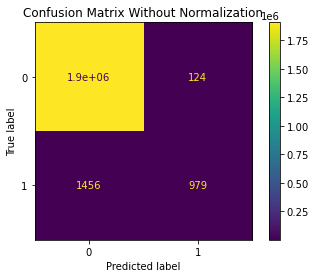

In [42]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_F_predict)
ConfusionMatrixDisplay(CM, display_labels=df['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [43]:
print(classification_report(y_test,y_F_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.40      0.55      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786

